In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("StudentDetails_final.csv")

In [3]:
display(df.head())

,Name,Subject,Marks
0,AnitaSharma,Data Structures,85.0
1,RahulVerma,Digital Circuits,78.0
2,PriyaMenon,Thermodynamics,91.0
3,Varun Iyer,Fluid Mechanics,74.0
4,Divya Nair,Algorithms,95.0


In [4]:
import pandas as pd
import sqlite3


csv_file = "StudentDetails_final.csv"
df = pd.read_csv(csv_file)

print("CSV Data Preview:")
print(df.head())

conn = sqlite3.connect("students.db")  
cursor = conn.cursor()

CSV Data Preview:
          Name           Subject  Marks
0  AnitaSharma   Data Structures   85.0
1   RahulVerma  Digital Circuits   78.0
2   PriyaMenon    Thermodynamics   91.0
3   Varun Iyer   Fluid Mechanics   74.0
4   Divya Nair        Algorithms   95.0


In [5]:
table_name = "students"
df.to_sql(table_name, conn, if_exists="replace", index=False)

print(f"\n✔ Data loaded into SQLite table '{table_name}' successfully!")


✔ Data loaded into SQLite table 'students' successfully!


In [8]:
query1 = f"SELECT * FROM {table_name} LIMIT 3;"
result1 = pd.read_sql_query(query1, conn)
print("\nTop 3 Rows:")
print(result1)


Top 3 Rows:
          Name           Subject  Marks
0  AnitaSharma   Data Structures   85.0
1   RahulVerma  Digital Circuits   78.0
2   PriyaMenon    Thermodynamics   91.0


In [10]:
query2 = f"SELECT COUNT(*) as total_records FROM {table_name};"
result2 = pd.read_sql_query(query2, conn)



In [10]:
display(result2)

,total_records
0,6


In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("students.db")  # make sure this matches your database file


In [3]:
table_name = "students"

In [7]:
result = pd.read_sql_query("SELECT * FROM students WHERE Marks > 90;", conn)
print(result)


         Name         Subject  Marks
0  PriyaMenon  Thermodynamics   91.0
1  Divya Nair      Algorithms   95.0


In [9]:
display(pd.read_sql_query("Select * from students where Marks<87;",conn))


,Name,Subject,Marks
0,AnitaSharma,Data Structures,85.0
1,RahulVerma,Digital Circuits,78.0
2,Varun Iyer,Fluid Mechanics,74.0
3,Arjun Singh,Microprocessors,81.0


In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("StudentDetails_final.csv")

In [14]:
display(df.head())

,Name,Subject,Marks
0,AnitaSharma,Data Structures,85.0
1,RahulVerma,Digital Circuits,78.0
2,PriyaMenon,Thermodynamics,91.0
3,Varun Iyer,Fluid Mechanics,74.0
4,Divya Nair,Algorithms,95.0


In [16]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     6 non-null      object 
 1   Subject  6 non-null      object 
 2   Marks    6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 276.0+ bytes


None

In [17]:
display(df.isna().sum())

Name       0
Subject    0
Marks      0
dtype: int64

In [18]:
display(df.describe())

,Marks
count,6.000000
mean,84.000000
std,7.949843
min,74.000000
25%,78.750000
50%,83.000000
75%,89.500000
max,95.000000


In [19]:
num_cols = df.select_dtypes(include="number").columns

In [20]:
means={}

In [22]:
i = 0
while i<len(num_cols):
    col = num_cols[i]
    means[col] = df[col].mean()
    i+=1
    print("\n Column means (manual loop):")


 Column means (manual loop):


In [23]:
for k,v in means.items():
    display(f"  {k:<20s}->{v:,.3f}")

'  Marks               ->84.000'

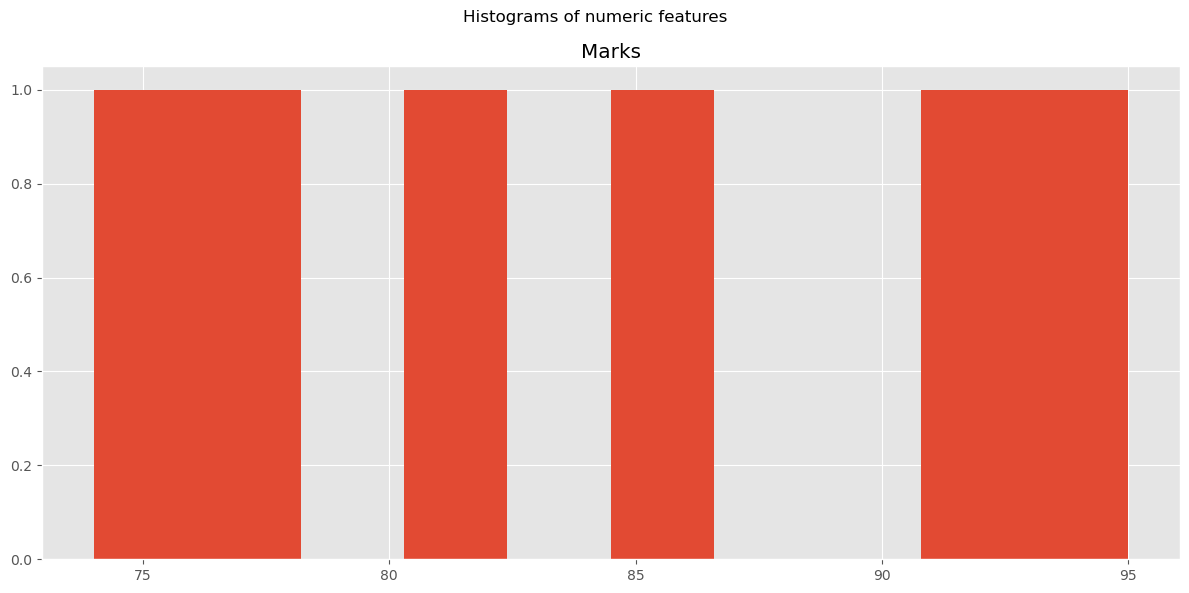

In [24]:
plt.style.use("ggplot")
df[num_cols].hist(figsize=(12,6))
plt.suptitle("Histograms of numeric features")
plt.tight_layout()
plt.show()

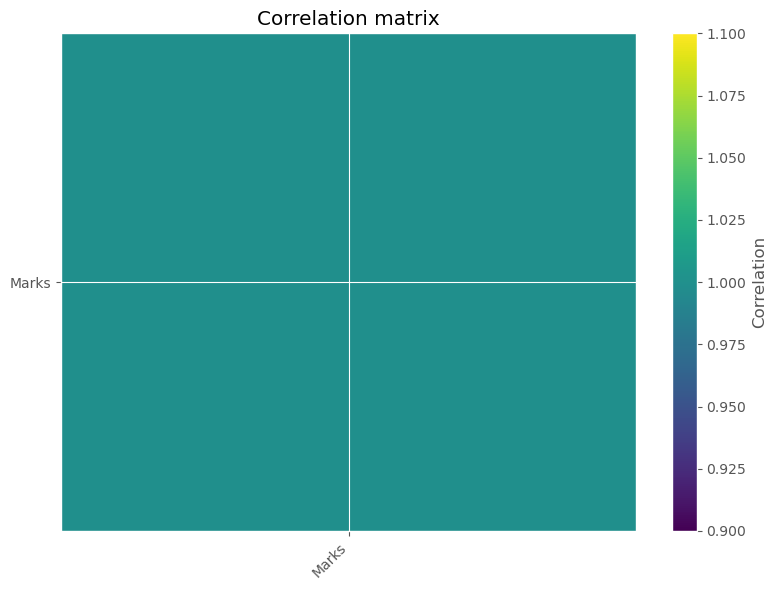

In [28]:
plt.figure(figsize=(8,6))
plt.imshow(df[num_cols].corr(),aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(range(len(num_cols)),num_cols,rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()


In [30]:
if len(num_cols) >= 2:
    x, y = num_cols[:2]
    plt.figure(figsize=(6, 4))
    plt.scatter(df[x], df[y], alpha=0.7)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Scatter plot: {x} vs {y}")
    plt.tight_layout()
    plt.show()